In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import operator

In [ ]:
#Read the datasets

transactions_df = pd.read_csv("transactions_train_subset.csv")
articles_df = pd.read_csv("articles_subset.csv")
customers_df = pd.read_csv("customers_subset.csv")

In [ ]:
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2
...,...,...,...,...,...
13310255,2020-09-15,ffe1791c9c6e3df9aafeebc77cf2cf03dd0123ac76ef90...,750422018,0.033441,2
13310256,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,853316001,0.008458,1
13310257,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,296366006,0.000847,1
13310258,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,789769001,0.013542,1


In [ ]:
#Read the test dataset 
transactions_test=pd.read_csv("transactions_test_subset.csv")

In [ ]:
transactions_test.head()

,customer_id,products
0,00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...,[903762001 879189005 158340001 867966009 91552...
1,000fb6e772c5d0023892065e659963da90b1866035558e...,[786022008 913272003 889669006 913272003 88966...
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,[237347060 562245001 610776105 456163060 91444...
3,001143bec624de9df82bd687babb382e00b0285e2371cc...,[759814034 759814034 837443001 890631002 90795...
4,001c1f8d70782f450524d3b3f404474dbd4a7d0d2ad78a...,[898886002]
...,...,...
20276,fff2282977442e327b45d8c89afde25617d00124d0f999...,[759054001 697564010 891322004 891322004 91889...
20277,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,[783517006 813298001 873279001 914805006 91552...
20278,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,[833459002]
20279,fff7e7674509592818bf453391af43a85eaaac9a52d858...,[624486049]


In [ ]:
#Using transactions_df dataframe, drop the columns such as price,date and channel_id
#Group by the data with the customer id column to get the transactions of each customer
temp = transactions_df.drop(['price','sales_channel_id','t_dat'],axis=1).groupby("customer_id")

**Generating Item-Feature Matrix**

In [ ]:
# Taking main features from the articles_df
features = ['article_id','product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name']
articles_df=articles_df[features]

In [ ]:
#Get the item-feature of the articles using dummies
article_features= pd.get_dummies(articles_df)

In [ ]:
item_feature=article_features.set_index("article_id")

In [ ]:
# Calculate the similarity between item-item using cosine similarity.
item_feature = cosine_similarity(item_feature)
item_feature

array([[1. , 0.7, 0.6, ..., 0.3, 0.7, 0.6],
       [0.7, 1. , 0.7, ..., 0. , 0.4, 0.3],
       [0.6, 0.7, 1. , ..., 0. , 0.3, 0.2],
       ...,
       [0.3, 0. , 0. , ..., 1. , 0.3, 0.3],
       [0.7, 0.4, 0.3, ..., 0.3, 1. , 0.8],
       [0.6, 0.3, 0.2, ..., 0.3, 0.8, 1. ]])

In [ ]:
# Convert it into a dataframe
item_feature=pd.DataFrame(item_feature,columns=item_feature.index)
item_feature=item_feature.set_index(item_feature.index)

In [ ]:
item_feature

article_id,108775015,108775044,108775051,110065001,110065002,110065011,111565001,111565003,111586001,111593001,111609001,112679048,114428030,116379047,118458003,118458004,118458028,118458029,118458034,118458038,118458039,120129001,120129014,120129018,120129025,123173001,126589006,126589007,126589010,126589011,129085001,129085026,129085027,130035001,144993001,145872001,145872037,145872043,145872051,145872052,...,943212001,943674001,944000001,944241001,944506001,944989001,945304001,945600001,945995002,946095001,946282001,946387001,946475001,946527001,946748001,946748003,946748004,946763001,946764002,946764003,946795001,946827001,946827002,947060001,947168001,947253001,947509001,947599001,947934001,948152001,948152002,949198001,949551001,949551002,949594001,952267001,952938001,953450001,953763001,956217002
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
108775015,1.0,0.7,0.6,0.5,0.2,0.2,0.5,0.2,0.5,0.5,0.5,0.2,0.2,0.8,0.3,0.2,0.6,0.3,0.3,0.4,0.2,0.6,0.4,0.4,0.3,0.5,0.5,0.2,0.1,0.1,0.9,0.6,0.5,0.5,0.5,0.5,0.2,0.2,0.4,0.2,...,0.2,0.1,0.2,0.5,0.3,1.0,0.3,0.4,0.1,0.1,0.5,0.1,0.4,0.2,0.4,0.3,0.4,0.4,0.3,0.4,0.6,0.6,0.3,0.1,0.4,0.4,0.2,0.7,0.4,0.1,0.1,0.9,0.5,0.2,0.4,0.4,0.3,0.3,0.7,0.6
108775044,0.7,1.0,0.7,0.2,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.7,0.2,0.2,0.3,0.2,0.3,0.2,0.2,0.3,0.2,0.3,0.2,0.2,0.2,0.1,0.2,0.2,0.6,0.9,0.5,0.2,0.2,0.2,0.1,0.5,0.1,0.1,...,0.2,0.1,0.2,0.2,0.3,0.7,0.1,0.5,0.1,0.0,0.2,0.0,0.1,0.2,0.4,0.3,0.5,0.4,0.3,0.4,0.3,0.3,0.3,0.0,0.1,0.1,0.2,0.4,0.1,0.1,0.1,0.6,0.2,0.2,0.3,0.1,0.3,0.0,0.4,0.3
108775051,0.6,0.7,1.0,0.1,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.3,0.2,0.6,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.5,0.6,0.6,0.1,0.1,0.1,0.1,0.2,0.1,0.1,...,0.4,0.1,0.1,0.1,0.2,0.6,0.1,0.6,0.2,0.0,0.2,0.0,0.0,0.1,0.4,0.4,0.3,0.4,0.3,0.4,0.2,0.2,0.2,0.0,0.1,0.0,0.1,0.3,0.1,0.1,0.2,0.5,0.1,0.2,0.2,0.1,0.3,0.0,0.3,0.2
110065001,0.5,0.2,0.1,1.0,0.7,0.7,0.6,0.3,0.6,0.6,0.6,0.0,0.6,0.3,0.1,0.0,0.4,0.1,0.1,0.2,0.0,0.5,0.3,0.3,0.2,0.6,0.5,0.2,0.1,0.1,0.5,0.2,0.1,0.5,0.6,0.4,0.1,0.1,0.3,0.1,...,0.1,0.1,0.2,0.5,0.4,0.5,0.2,0.2,0.0,0.1,0.4,0.1,0.4,0.2,0.2,0.1,0.2,0.2,0.1,0.2,0.5,0.5,0.2,0.2,0.3,0.4,0.2,0.5,0.5,0.0,0.0,0.5,0.4,0.1,0.3,0.5,0.1,0.3,0.5,0.5
110065002,0.2,0.5,0.2,0.7,1.0,0.7,0.3,0.3,0.3,0.3,0.3,0.0,0.6,0.2,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.2,0.1,0.2,0.1,0.3,0.2,0.1,0.2,0.2,0.2,0.5,0.1,0.2,0.3,0.1,0.0,0.4,0.0,0.0,...,0.1,0.1,0.2,0.2,0.4,0.2,0.0,0.3,0.0,0.0,0.1,0.0,0.1,0.2,0.2,0.1,0.3,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.0,0.1,0.2,0.2,0.2,0.0,0.0,0.2,0.1,0.1,0.2,0.2,0.1,0.0,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952267001,0.4,0.1,0.1,0.5,0.2,0.2,0.9,0.6,0.8,0.9,0.9,0.0,0.2,0.2,0.1,0.0,0.3,0.1,0.0,0.2,0.0,0.4,0.3,0.2,0.2,0.8,0.4,0.2,0.1,0.1,0.4,0.1,0.1,0.4,0.9,0.3,0.1,0.0,0.3,0.1,...,0.1,0.0,0.1,0.4,0.2,0.4,0.2,0.1,0.0,0.1,0.4,0.1,0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.4,0.4,0.1,0.1,0.3,0.3,0.1,0.4,0.9,0.0,0.0,0.4,0.3,0.0,0.2,1.0,0.1,0.5,0.4,0.4
952938001,0.3,0.3,0.3,0.1,0.1,0.1,0.1,0.3,0.1,0.1,0.1,0.2,0.1,0.3,0.0,0.1,0.0,0.0,0.1,0.0,0.1,0.4,0.4,0.4,0.5,0.1,0.1,0.2,0.1,0.1,0.2,0.2,0.2,0.1,0.1,0.2,0.2,0.2,0.2,0.2,...,0.4,0.0,0.1,0.1,0.3,0.3,0.2,0.4,0.3,0.0,0.2,0.0,0.0,0.1,0.4,0.4,0.4,0.3,0.5,0.4,0.2,0.2,0.3,0.1,0.2,0.0,0.2,0.5,0.1,0.2,0.1,0.2,0.2,0.2,0.4,0.1,1.0,0.0,0.5,0.5
953450001,0.3,0.0,0.0,0.3,0.0,0.0,0.5,0.2,0.4,0.5,0.5,0.0,0.0,0.1,0.4,0.3,0.6,0.4,0.3,0.5,0.3,0.3,0.2,0.1,0.1,0.4,0.3,0.1,0.0,0.0,0.3,0.0,0.0,0.3,0.5,0.3,0.1,0.0,0.3,0.1,...,0.0,0.0,0.0,0.3,0.0,0.3,0.2,0.0,0.0,0.1,0.3,0.1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.0,0.4,0.3,0.3,0.0,0.3,0.5,0.0,0.0,0.3,0.3,0.0,0.1,0.5,0.0,1.0,0.3,0.3


**Generating User feature matrix**

In [ ]:
articles = articles_df[features]
merged_data = temp[['customer_id', 'article_id']].merge(item_feature, on='article_id', how='left')

In [ ]:
merged_data.shape

(13310260, 471)

In [ ]:
user_feature=merged_data.groupby("customer_id")[merged_data.columns[2:]].sum()

In [ ]:
user_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Fun,product_group_name_Furniture,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,product_group_name_Interior textile,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,product_group_name_Stationery,product_group_name_Swimwear,product_group_name_Underwear,product_group_name_Underwear/nightwear,product_group_name_Unknown,graphical_appearance_name_All over pattern,graphical_appearance_name_Application/3D,graphical_appearance_name_Argyle,graphical_appearance_name_Chambray,graphical_appearance_name_Check,graphical_appearance_name_Colour blocking,graphical_appearance_name_Contrast,graphical_appearance_name_Denim,graphical_appearance_name_Dot,graphical_appearance_name_Embroidery,graphical_appearance_name_Front print,graphical_appearance_name_Glittering/Metallic,graphical_appearance_name_Hologram,graphical_appearance_name_Jacquard,graphical_appearance_name_Lace,graphical_appearance_name_Melange,graphical_appearance_name_Mesh,graphical_appearance_name_Metallic,graphical_appearance_name_Mixed solid/pattern,graphical_appearance_name_Neps,graphical_appearance_name_Other pattern,...,section_name_Men Suits & Tailoring,section_name_Men Underwear,section_name_Mens Outerwear,section_name_Special Collections,section_name_Womens Big accessories,section_name_Womens Casual,section_name_Womens Everyday Basics,section_name_Womens Everyday Collection,section_name_Womens Jackets,section_name_Womens Lingerie,"section_name_Womens Nightwear, Socks & Tigh",section_name_Womens Premium,section_name_Womens Shoes,section_name_Womens Small accessories,"section_name_Womens Swimwear, beachwear",section_name_Womens Tailoring,section_name_Womens Trend,section_name_Young Boy,section_name_Young Girl,garment_group_name_Accessories,garment_group_name_Blouses,garment_group_name_Dressed,garment_group_name_Dresses Ladies,garment_group_name_Dresses/Skirts girls,garment_group_name_Jersey Basic,garment_group_name_Jersey Fancy,garment_group_name_Knitwear,garment_group_name_Outdoor,garment_group_name_Shirts,garment_group_name_Shoes,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,4.0,0.0,0.0,0.0,0.0,9.0,9.0,25.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,33.0,3.0,0.0,0.0,16.0,0.0,0.0,0.0,2.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,1.0,12.0,1.0,3.0,0.0,0.0,3.0,2.0,33.0,3.0,0.0,0.0,0.0,4.0,2.0,2.0,5.0,0.0,3.0,11.0,7.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,33.0,2.0,4.0,3.0,0.0,3.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,4.0,0.0,0.0,0.0,0.0,11.0,18.0,34.0,0.0,0.0,0.0,7.0,13.0,6.0,0.0,0.0,27.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,8.0,8.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0,5.0,23.0,17.0,6.0,6.0,0.0,1.0,4.0,2.0,0.0,0.0,3.0,8.0,0.0,10.0,0.0,2.0,11.0,3.0,10.0,0.0,11.0,3.0,7.0,8.0,4.0,1.0,5.0,0.0,33.0,1.0,0.0
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75,5.0,0.0,0.0,0.0,0.0,0.0,71.0,84.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,2.0,3.0,0.0,0.0,28.0,2.0,5.0,5.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,3.0,0.0,4.0,3.0,4.0,39.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,5.0,7.0,4.0,2.0,0.0,12.0,48.0,6.0,6.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,1.0,0.0
0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c9199e53dbb81641becd7,3.0,0.0,0.0,0.0,0.0,10.0,25.0,

In [ ]:
#Scale the user feature data by using Min-Max scaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(p.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=p.columns,index= p.index)

In [ ]:
user_feature = df_scaled

In [ ]:
user_feature

**Generating User-Item Score Matrix**

In [ ]:
# To get the user_item_score we need the dot product between user and item_feature.
user_item_score = user_feature.dot(item_feature.T)

In [ ]:
# Sort the indexes of the user_item_score
user_item_score=user_item_score.sort_index()

In [ ]:
user_item_score

article_id,108775015,108775044,108775051,110065001,110065002,110065011,111565001,111565003,111586001,111593001,111609001,112679048,114428030,116379047,118458003,118458004,118458028,118458029,118458034,118458038,118458039,120129001,120129014,120129018,120129025,123173001,126589006,126589007,126589010,126589011,129085001,129085026,129085027,130035001,144993001,145872001,145872037,145872043,145872051,145872052,...,943212001,943674001,944000001,944241001,944506001,944989001,945304001,945600001,945995002,946095001,946282001,946387001,946475001,946527001,946748001,946748003,946748004,946763001,946764002,946764003,946795001,946827001,946827002,947060001,947168001,947253001,947509001,947599001,947934001,948152001,948152002,949198001,949551001,949551002,949594001,952267001,952938001,953450001,953763001,956217002
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00077dbd5c4a4991e092e63893ccf29294a9d5c46e85010e95f2fc10bf9437a4,0.348827,0.333045,0.278889,0.284825,0.269043,0.250357,0.273414,0.257977,0.299165,0.273414,0.273414,0.132239,0.282094,0.318894,0.210702,0.207179,0.308763,0.210702,0.263496,0.252681,0.208655,0.295416,0.239334,0.211963,0.183659,0.299165,0.402924,0.285785,0.350747,0.321396,0.342832,0.327050,0.243586,0.348379,0.273414,0.242969,0.144908,0.227187,0.210970,0.181038,...,0.192284,0.225861,0.380197,0.389084,0.332043,0.348827,0.167592,0.294486,0.145411,0.125646,0.287043,0.096008,0.394032,0.460418,0.241378,0.291287,0.249013,0.180379,0.194218,0.278726,0.290958,0.293457,0.236207,0.248970,0.193354,0.394032,0.302107,0.301411,0.222184,0.118271,0.135535,0.342832,0.269122,0.226193,0.241374,0.222184,0.233771,0.164102,0.301411,0.299725
000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,2.072309,2.933190,2.365938,1.632974,2.493855,1.562176,2.102799,2.295943,2.290724,2.102799,2.102799,1.739725,1.474840,2.568258,0.909165,1.147903,1.318322,0.909165,1.581567,1.020177,1.427831,2.139683,1.841538,2.360148,1.714489,2.290724,2.007155,1.647264,1.926083,1.969596,2.002924,2.863805,1.722519,1.827231,2.102799,1.512002,1.102846,2.372883,1.255933,1.751883,...,2.125712,0.961140,2.091202,2.015050,2.377534,2.072309,2.185563,2.177249,1.351967,1.023890,1.524195,1.040321,1.374516,2.754994,2.119478,1.670366,2.494702,1.924603,1.917643,1.813163,2.293811,1.954385,2.278026,1.483277,2.668192,1.374516,2.304800,2.209068,1.969807,1.514598,2.104280,2.002924,1.518550,1.671809,1.958462,1.846730,2.177371,0.932993,2.209068,1.975734
0010e8eb18f131e724d6997909af0808adbba057529edb1523944f7d4e02b4ce,0.567452,0.489017,0.439785,0.429843,0.351409,0.340346,0.323146,0.264731,0.358070,0.323146,0.323146,0.483517,0.382594,0.529230,0.397661,0.484573,0.380694,0.397661,0.344499,0.421783,0.314952,0.385319,0.426408,0.364104,0.347893,0.358070,0.381699,0.223246,0.198658,0.198658,0.557720,0.479285,0.641576,0.333214,0.323146,0.298672,0.315638,0.220237,0.316799,0.278577,...,0.380703,0.199125,0.235623,0.477671,0.331879,0.567452,0.293519,0.296265,0.211669,0.292853,0.337763,0.268667,0.406062,0.306674,0.333327,0.429716,0.372924,0.245854,0.330737,0.304862,0.428632,0.391950,0.379147,0.171332,0.326216,0.406062,0.395920,0.395052,0.273965,0.203467,0.183445,0.557720,0.345156,0.288938,0.305897,0.273965,0.274397,0.175471,0.395052,0.363594
001143bec624de9df82bd687babb382e00b0285e2371cc9120de5d42c48f1076,0.294870,0.162876,0.130093,0.279101,0.147107,0.189381,0.304509,0.228939,0.339057,0.304509,0.304509,0.524775,0.210811,0.233048,0.310475,0.253521,0.282937,0.310475,0.204839,0.277895,0.167736,0.390156,0.385114,0.274813,0.390693,0.339057,0.393278,0.267940,0.198999,0.321565,0.323950,0.191956,0.274512,0.350853,0.304509,0.300055,0.327594,0.168061,0.283819,0.221998,...,0.268913,0.256189,0.302463,0.370326,0.255740,0.294870,0.520544,0.192468,0.347441,0.215335,0.250828,0.203972,0.372951,0.338803,0.204663,0.257992,0.291195,0.171931,0.178094,0.222443,0.322302,0.323839,0.235733,0.135704,0.320680,0.372951,0.252493,0.376057,0.271927,0.195449,0.154111,0.323950,0.430658

In [ ]:

# To get the recommendations for the given customer_id.
def get_rcmnd(customer_id, scores):
    # Get the scores of each customer id
    customer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = customer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered

**To get the recommendations using item-item collaborative filtering.**

In [ ]:

test_predictions=pd.DataFrame(columns=["customer_id","predictions"])
groupby_customer = merged_data.groupby('customer_id')
groups = dict(list(groupby_customer))
def similar_items(customer_id,item_feature1,user_item_score,test_predictions):
  k=12
  # Get the list of articles for which the customer don't have score.
  articles_no_score=(user_item_score.loc[customer_id].keys()[user_item_score.loc[customer_id]==0]).values
  # Get the list of articles for which the customer has score.
  articles_with_score=(user_item_score.loc[customer_id].keys()[user_item_score.loc[customer_id]!=0]).values
  for i in articles_no_score:
    #For each article get the top 10 similar articles
    j=dict(item_feature1.loc[i])
    sorted_items=[i[1] for i in sorted(j.items(), key=operator.itemgetter(1))][:10]
    score=0
    n=0
    for sort in sorted_items:
      if sort in articles_with_score:
        #Calculate the score for the unscored article
        score+=user_item_score.loc[customer_id,sort]*item_feature1.loc[i,sort]
        n+=item_feature1.loc[i,sort]
    if n!=0:  
      #Take this score as the rating for the unrated article.
      user_item_score.at[customer_id,i]=score/n
  # Get recommendations for the given customer after calculating scores for the articles which the customer didn't bought.
  rcmnds=get_rcmnd(customer_id, user_item_score).index.values[:k]
  # Add the predictions of the customer to the test predictions dataframe.
  test_predictions=test_predictions.append({"customer_id":customer_id,"predictions":rcmnds},ignore_index=True)
  return test_predictions

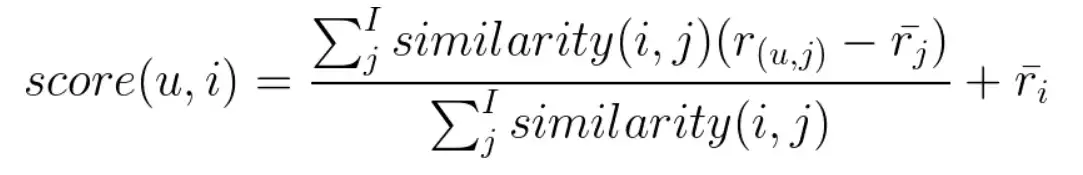

In [ ]:
#Calculate the predictions for the entire test customer data.
for i in user_item_score.index:
    test_predictions=similar_items(i,item_feature,user_item_score,test_predictions)

In [ ]:
# Show the first top 10 customer_ids with their predictions
test_predictions.head(10)

,customer_id,predictions
0,00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...,[407663008 590494001 654100005 726130002 69500...
1,000fb6e772c5d0023892065e659963da90b1866035558e...,[769263002 703399003 791488007 575535008 86493...
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,[763157006 550445003 610776007 456163002 68181...
3,001143bec624de9df82bd687babb382e00b0285e2371cc...,[779574001 829358001 749484006 660200003 66206...
4,001c1f8d70782f450524d3b3f404474dbd4a7d0d2ad78a...,[663236002 738881001 711431007 760866002 87475...
5,001ddeb8fb74fec5693116da83b488e05ee9a9e179f3fd...,[564312033 564314034 564310037 564314020 56431...
6,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,[780724002 760656003 755473003 589818006 82735...
7,002253f0e3869ca2833ca2dfec4f8995ad9cdf8ca2333a...,[588533002 691736006 554541029 803160002 81141...
8,00250644a9628fb8c4aebabf555d3caabe44c99c74fbcf...,[764598002 736066005 711193004 729315004 72013...
9,0026906d6c593cd34993ee283861e050272cb193026eb8...,[684021091 699923105 621523006 581994009 73086...


In [ ]:
test_predictions.to_csv(f"test_predictions_collab.csv",index=False)